# Twitter Sentiment Analysis and Visualization

The main goal here is to analyze the general sentiment towards Covid related news via Tweets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [2]:
df_tweets = pd.read_csv(r'data/covid_tweets.csv')

In [9]:
df_tweets.head()

,Handle,Username,Date,Tweet,likes,retweets,replies,lang,neg,neu,pos,compound,Sentiment
0,@rtehrani,Rich Tehrani,2020-05-31 23:39:32,@UnitedHealthGrp and @Microsoft Launch Protect...,0,0,0,en,0.000,1.000,0.000,0.0000,Neutral
1,@TomthunkitsMind,Tomthunkit™,2020-05-31 23:38:12,1 OF THE 3 #CORONAVIRUS BOMBSHELLS IN MY BOOK ...,1,0,0,en,0.108,0.821,0.071,-0.2185,Neutral
2,@GBLHealthImpact,Global Health Impact,2020-05-31 23:35:07,Strong leadership from governments and the @WH...,1,1,0,en,0.085,0.712,0.203,0.7759,Positive
3,@SynchronySys,Synchrony Systems,2020-05-31 23:35:04,RT @FintechCH: Report: Consumers Turn to Non-T...,3,1,0,en,0.170,0.830,0.000,-0.6249,Negative
4,@BudgetHawks,CRFB.org,2020-05-31 23:35:00,How much #COVIDRelief has been committed/disbu...,7,3,0,en,0.000,1.000,0.000,0.0000,Neutral


Method 1: Separate sentiment scores into bins

In [30]:
bins = np.linspace(min(df_tweets['compound']), max(df_tweets['compound']), 4)

In [31]:
group_names = ['Negative', 'Neutral', 'Positive']

In [32]:
df_tweets['Sentiment'] = pd.cut(df_tweets['compound'], bins, labels = group_names, include_lowest=True)

In [10]:
df_tweets[df_tweets['Sentiment']=='Neutral'].head()

,Handle,Username,Date,Tweet,likes,retweets,replies,lang,neg,neu,pos,compound,Sentiment
0,@rtehrani,Rich Tehrani,2020-05-31 23:39:32,@UnitedHealthGrp and @Microsoft Launch Protect...,0,0,0,en,0.000,1.000,0.000,0.0000,Neutral
1,@TomthunkitsMind,Tomthunkit™,2020-05-31 23:38:12,1 OF THE 3 #CORONAVIRUS BOMBSHELLS IN MY BOOK ...,1,0,0,en,0.108,0.821,0.071,-0.2185,Neutral
4,@BudgetHawks,CRFB.org,2020-05-31 23:35:00,How much #COVIDRelief has been committed/disbu...,7,3,0,en,0.000,1.000,0.000,0.0000,Neutral
5,@juniajacinto,Junia Jacinto,2020-05-31 23:34:49,DAD. Pt.1\n @_BreezyNipples\n#thisvirus #covid...,5,2,3,en,0.000,1.000,0.000,0.0000,Neutral
6,@InsidrFinancial,Insider Financial,2020-05-31 23:33:33,$BIXT seems to have a drug that has been throu...,0,0,0,en,0.000,1.000,0.000,0.0000,Neutral


Method 2: Set bins based on score value

In [33]:
df_tweets['Category'] = df_tweets['compound'].apply(lambda x: 'Positive'if x > 0 else \
                                                    ('Negative' if x < 0 else 'Neutral'))

Create Plots for Dashboard

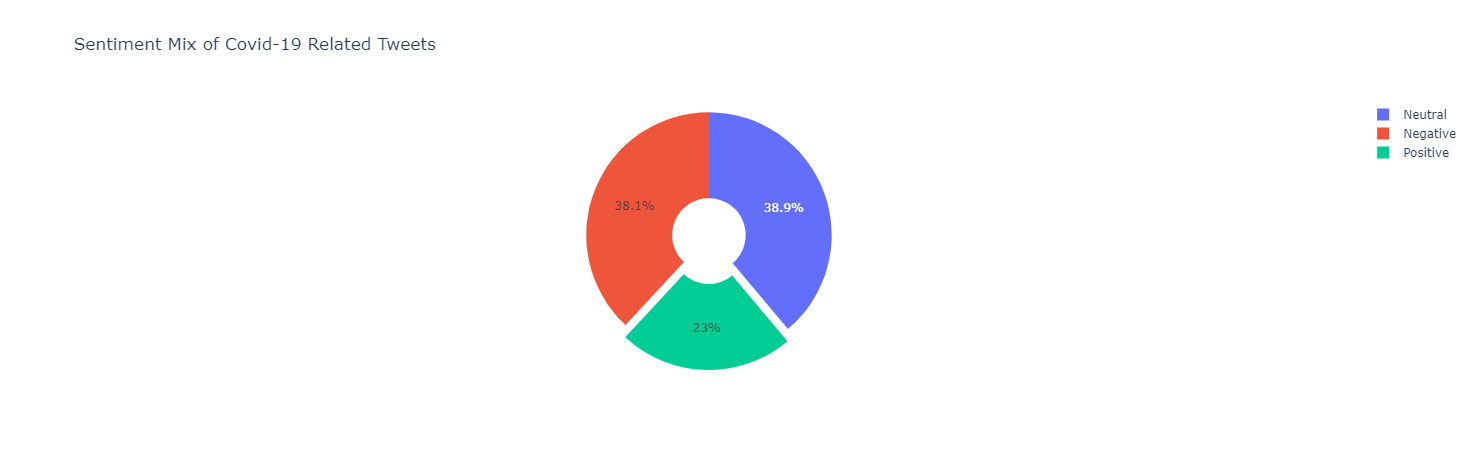

In [84]:
fig_pie = go.Figure(data=[go.Pie(
    labels = df_tweets['Category'].unique(),
    values = df_tweets['Category'].value_counts(),
    hole=.3,
    pull=[0,0,0.1]
)])
fig_pie.update_layout(
title='Sentiment Mix of Covid-19 Related Tweets',
    #template='plotly_dark'
)

fig_pie.show()